# data info
>- High(최고가)
>- Low(최저가)
>- Open(시가)
>- Close(종가)
>- Volume(거래량)
>- Adj Close(수정종가;분할,배당,배분,신주 발생이 된 경우를 고려하여 주식가격을 조정해둔 가격)

In [ ]:
# from pandas_datareader import data as web # 주가 데이터
# SEC = web.DataReader("005930.KS", "yahoo", start, end) # 삼성전자

import datetime
import yfinance as yf

# 시작일, 종료일
dataStart = datetime.datetime(2018, 10, 31)
dataEnd = datetime.datetime(2024, 12, 1)


btc_data = yf.download('BTC-USD',
                       start = dataStart,
                       end = dataEnd)

print("Data print")
print(btc_data.head())
print('\n')
print(btc_data.info())

[*********************100%***********************]  1 of 1 completed

Data print
Price         Adj Close        Close         High          Low         Open  \
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD      BTC-USD   
Date                                                                          
2018-10-31  6317.609863  6317.609863  6349.160156  6316.879883  6336.990234   
2018-11-01  6377.779785  6377.779785  6547.140137  6311.830078  6318.140137   
2018-11-02  6388.439941  6388.439941  6396.859863  6327.379883  6378.919922   
2018-11-03  6361.259766  6361.259766  6400.069824  6342.370117  6387.240234   
2018-11-04  6376.129883  6376.129883  6388.629883  6294.569824  6365.470215   

Price           Volume  
Ticker         BTC-USD  
Date                    
2018-10-31  4191240000  
2018-11-01  3789400000  
2018-11-02  4234870000  
2018-11-03  3658640000  
2018-11-04  4390020000  


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2223 entries, 2018-10-31 to 2024-11-30
Data columns (total 6 columns):
 #   Column                Non

In [ ]:
# 거래량이 0인 일자 제거 & 수정종가 데이터만 사용
data = btc_data['Adj Close'][btc_data['Volume'] != 0]
print(data.columns)
data

Index(['BTC-USD'], dtype='object', name='Ticker')


Ticker,BTC-USD
Date,
2018-10-31,6317.609863
2018-11-01,6377.779785
2018-11-02,6388.439941
2018-11-03,6361.259766
2018-11-04,6376.129883
...,...
2024-11-26,91985.320312
2024-11-27,95962.531250
2024-11-28,95652.468750


In [ ]:
"""
data to sheet
"""
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=data)

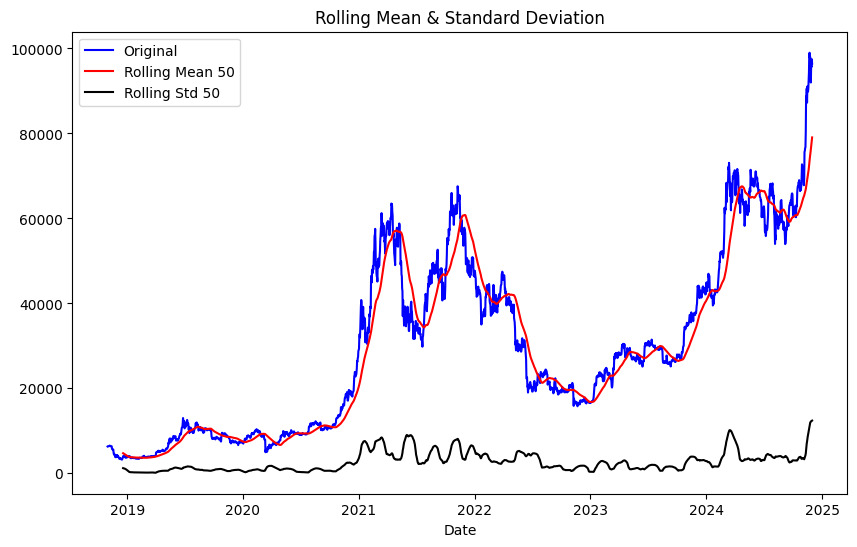

In [ ]:
import matplotlib.pyplot as plt # 시각화

def plot_rolling(data, interval):
    rolmean = data.rolling(interval).mean()
    rolstd = data.rolling(interval).std()

    # Plot rolling statistics:
    plt.figure(figsize=(10, 6))
    plt.xlabel('Date')
    orig = plt.plot(data, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean {}'.format(interval))
    std = plt.plot(rolstd, color='black', label = 'Rolling Std {}'.format(interval))
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

# 50일치 평균내어 이동평균계산
plot_rolling(data, 50)